In [43]:
# Este é o estudo de caso relacionado à detecção de intrusão do curso de Introdução à Ciência de Dados Aplicada à Cibersegurança

In [44]:
# Primeiro passo, importar a bibliotecas pandas e carregar o arquivo que utilizaremos. 

In [45]:
import pandas as pd
# Data ..... git clone https://github.com/defcom17/NSL_KDD
dataset = "data/KDDTrain+.csv"
Data_IDS = pd.read_csv(f'{dataset}', header=None)

In [46]:
#Mostrando as colunas do arquivo carregado. Veja que elas não tem rótulos.
Data_IDS.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

In [47]:
# Atribuíndo rótulos às colunas pra facilitar. Eu indico pra vocês o que é cada coluna. 
# Os nomes estão em inglês pra facilitar a correção com a documentação do dataset.

Columns = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [48]:
# Agora vejamos novamente após a atribuição dos rótulos nas colunas.
Data_IDS = pd.read_csv(f'{dataset}', names=Columns, header=None)
Data_IDS.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty'],
      dtype='object')

In [49]:
# Este comando resume as estatísticas do data frame Data_IDS por coluna
Data_IDS.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [50]:
Data_IDS.label

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, Length: 125973, dtype: object

In [51]:
# Importando a biblioteca de preprocessamento dos dados
from sklearn import preprocessing

In [52]:
# Veja como está antes do processamento
Data_IDS.protocol_type

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocol_type, Length: 125973, dtype: object

In [53]:
# Antes de treinar o modelo, alguns passos adicionais são necessários para o preprocessamento, pois algumas colunas possuem valores não numéricos.
# sklearn.preprocessing.LabelEncoder codifica os valores entre 0 e n_classes-1 e fit_transform(y).
# Ajusta os códigos e retorna os valores codificados.
# No nosso caso, nós transformamos valores não numéricos em valores numéricos.
# Nós precisamos preprocessar quatro classes: protocol_type, service, flag, e label.
# Para fazer isso, nós usamos o método fit.transform(), que calibra as medições.

Data_IDS.protocol_type = preprocessing.LabelEncoder().fit_transform(Data_IDS["protocol_type"])
Data_IDS.service = preprocessing.LabelEncoder().fit_transform(Data_IDS["service"])
Data_IDS.flag = preprocessing.LabelEncoder().fit_transform(Data_IDS["flag"])
Data_IDS.label = preprocessing.LabelEncoder().fit_transform(Data_IDS["label"])

In [54]:
# Agora depois do preprocessamento
Data_IDS.protocol_type

0         1
1         2
2         1
3         1
4         1
         ..
125968    1
125969    2
125970    1
125971    1
125972    1
Name: protocol_type, Length: 125973, dtype: int64

In [55]:
Data_IDS.label.values

array([11, 11,  9, ..., 11,  9, 11])

In [56]:
# No scikit-learn, existem dois diferentes métodos: fit e fit_transform.
# A diferença entre eles é que o fit calcula os parâmetros (μ e σ, onde μ é a média da população e σ é o desvio padrão) 
# e salva eles internamente, enquanto o fit_transform não faz isso, mas ele aplica a transformação para um conjunto particular de amostras.

In [57]:
# Vamos identificar o nosso dado.

X = Data_IDS[Columns].values
y = Data_IDS.label.values

print(y, end= '\n\n')
print(X)

[11 11  9 ... 11  9 11]

[[ 0.  1. 20. ...  0. 11. 20.]
 [ 0.  2. 44. ...  0. 11. 15.]
 [ 0.  1. 49. ...  0.  9. 19.]
 ...
 [ 0.  1. 54. ...  0. 11. 18.]
 [ 0.  1. 30. ...  0.  9. 20.]
 [ 0.  1. 20. ...  0. 11. 21.]]


In [58]:
Data_IDS.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21


In [59]:
# Yellowbrick é uma biblioteca de visualização associada ao scikit-learn.
# É um bônus para vocês em relação às bibliotecas que já foram apresentadas neste curso.

from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

/home/padua/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/padua/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


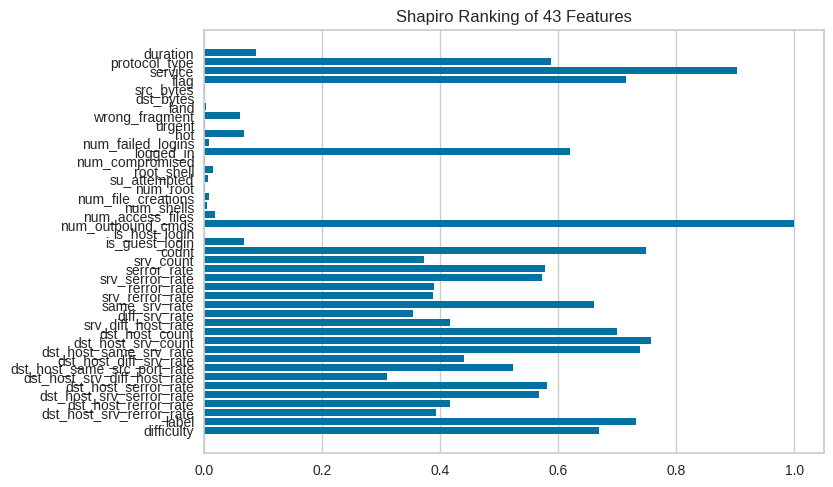

<Axes: title={'center': 'Shapiro Ranking of 43 Features'}>

In [60]:
# Rank1D(features=Columns, algorithm='shapiro')
# Rank1D e Rank2D avaliam uma simples feature ou em pares. 
# No nosso caso, nós usamos um ranqueamento de uma dimensão abaixo.
# O parâmetro Shapiro se refere ao algoritmo de ranqueamento chamado de Shapiro-Wilk. 
# Você pode fazer como exercício um entendimento deste algoritmo de ranqueamento e também utilizar outros. 

visualizer = Rank1D(features=Columns, algorithm='shapiro')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [61]:
# Para salvar o plot no arquivo. 
#visualizer.poof(outpath="Figure1.png")

In [62]:
# Rank2D realiza um ranqueamento por pares de features. 
visualizer = Rank2D(features=Columns, algorithm='covariance')

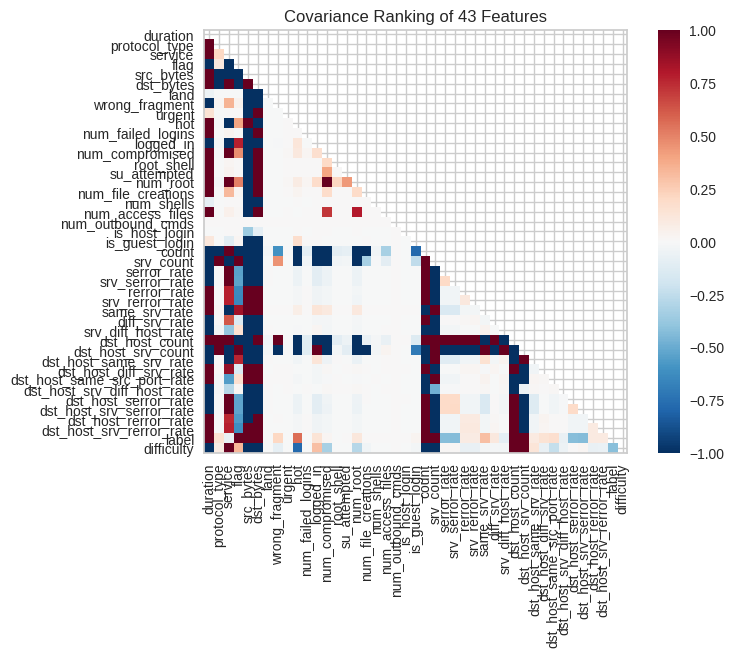

<Axes: title={'center': 'Covariance Ranking of 43 Features'}>

In [63]:
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [64]:
# Yellowbrick oferece a possibilidade de decompor um conjunto de dados de alta dimensionalidade.
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition

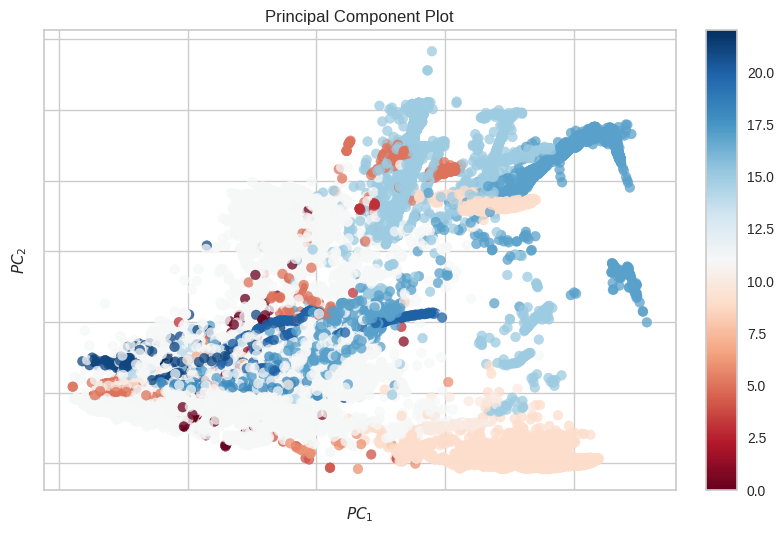

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [65]:
# Plotando as dimensões (PCA2 vs PCA1)

visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

In [66]:
# Tentando o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [67]:
# Separando as amostras para o classificador. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [68]:
# Treinando o modelo de ML para detectar intrusões.

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
Score = clf.score(X_test,y_test)

print(Score*100)

91.9321549534293


In [69]:
# Você pode fazer como exercício a avaliação desse modelo com outras métricas.
# Aqui foram calculadas, a precisão, a revocação e a pontuação F1.

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

recall = recall_score(y_test, clf.predict(X_test), average='weighted')
precision = precision_score(y_test, clf.predict(X_test), average='weighted')
f1 = f1_score(y_test, clf.predict(X_test), average='weighted')

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")

/home/padua/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.919321549534293
Precision: 0.8697707063800529
F1: 0.8904251657903068


In [70]:
# Treinando o modelo com um max_depth maior para as árvores de decisão geradas.

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
Score = clf.score(X_test,y_test)

print(Score*100)

98.4017781541067


In [71]:
recall = recall_score(y_test, clf.predict(X_test), average='weighted')
precision = precision_score(y_test, clf.predict(X_test), average='weighted')
f1 = f1_score(y_test, clf.predict(X_test), average='weighted')

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")


/home/padua/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.9840177815410669
Precision: 0.9756962758993978
F1: 0.9790757183849044


A seguir será utilizado o algoritmo de KNN como alternativa para a predição a prtir dos dados

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
Score = knn.score(X_test,y_test)


In [76]:
print(Score*100)

98.97332768839966


In [77]:
recall = recall_score(y_test, knn.predict(X_test), average='weighted')
precision = precision_score(y_test, knn.predict(X_test), average='weighted')
f1 = f1_score(y_test, knn.predict(X_test), average='weighted')

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")

/home/padua/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.9897332768839966
Precision: 0.9893403653308339
F1: 0.9894681608094112
